In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
Student = pd.read_csv("student-mat.csv")
Student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
Student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [28]:
Student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [29]:
label_encoder = LabelEncoder()
columns = ["school", "sex", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
Student[columns] = Student[columns].apply(label_encoder.fit_transform)

In [30]:
Student.drop("G1", axis = 1, inplace = True)
Student.drop("G2", axis = 1, inplace = True)

In [31]:
X = Student[["school", "sex", "age", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "failures", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]]

Y = Student["G3"]

In [32]:
X.dtypes

school        int32
sex           int32
age           int64
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int64
studytime     int64
failures      int64
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
dtype: object

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [34]:
Classifier = RandomForestClassifier(n_estimators = 100)
Classifier.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = Classifier.predict(x_test)
y_pred

array([ 9,  0, 11, 11, 13, 12, 11, 11,  0,  0, 11, 14, 10, 10, 11, 11, 11,
       15, 15, 10,  9, 11, 11, 12, 14, 13, 10,  0,  9, 11, 10,  8, 11, 10,
        6, 11,  0, 10, 11, 12,  8, 10, 11, 14, 10,  0, 10, 11, 10,  0,  0,
       10, 15, 10,  0, 10, 11,  0, 10, 15,  9,  0, 18, 13,  0, 11, 10, 11,
       10, 11, 15,  0, 14, 11, 15, 12, 11, 11,  9], dtype=int64)

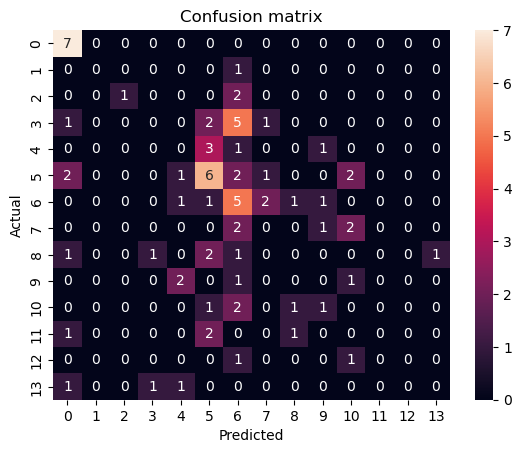

              precision    recall  f1-score   support

           0       0.54      1.00      0.70         7
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         5
          10       0.35      0.43      0.39        14
          11       0.22      0.45      0.29        11
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         3

    accuracy                           0.24        79
   macro avg       0.15      0.16      0.13        79
weighted avg       0.18      0.24      0.19        79



C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
metrics = confusion_matrix(y_test, y_pred)

sns.heatmap(metrics, annot = True, fmt = "d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))